In [53]:
from matplotlib import pyplot as plt
import h5py
import numpy as np
import matplotlib.gridspec as gridspec
import random
from astroML.correlation import two_point
import stats

cdm = h5py.File('Data\COLOR_CDM_galaxies.hdf5', 'r')
wdm = h5py.File('Data\COLOR_WDM_galaxies.hdf5', 'r')

print(cdm,wdm)

<HDF5 file "COLOR_CDM_galaxies.hdf5" (mode r)> <HDF5 file "COLOR_WDM_galaxies.hdf5" (mode r)>


In [54]:
# Access mass/position for wdm/cdm
print(list(cdm.keys()),list(wdm.keys()))

cdm_color = cdm[list(cdm.keys())[0]][:]
cdm_position = cdm[list(cdm.keys())[1]][:]
cdm_mass = cdm[list(cdm.keys())[3]][:]

wdm_color = wdm[list(wdm.keys())[0]][:]
wdm_position = wdm[list(cdm.keys())[1]][:]
wdm_mass = wdm[list(wdm.keys())[3]][:]

cdm_color, cdm_position, cdm_mass, wdm_color, wdm_position, wdm_mass

['Colour', 'GalaxyPos', 'IsCentral', 'StellarMass'] ['Colour', 'GalaxyPos', 'IsCentral', 'StellarMass']


(array([ 0.32435036,  0.58950651,  0.32047844, ...,  0.58985472,
         0.3150177 ,  0.60267353]),
 array([[ 17.43208122,  80.25539398,  54.00876999],
        [ 17.43210793,  80.22522736,  53.97425079],
        [ 19.06316185,  80.02703857,  54.18655014],
        ..., 
        [ 67.22305298,  64.69418335,  36.19010544],
        [  7.28926134,  78.05925751,  49.41135025],
        [  6.75961494,  77.04682159,  48.55372238]]),
 array([  2.37800096e+08,   1.14038586e+03,   4.39743280e+07, ...,
          6.31516409e+00,   3.49365275e+06,   2.19290527e+04]),
 array([ 0.29584217,  0.29859257,  0.59355354, ...,  0.32156372,
         0.59656096,  0.32803154]),
 array([[ 17.61932182,  79.06235504,  52.68593979],
        [ 18.65647697,  80.58162689,  52.30108261],
        [ 18.58250046,  80.91363525,  52.45199203],
        ..., 
        [ 76.68208313,  28.50509262,  59.96631622],
        [ 33.62237167,   9.74790382,   4.82571173],
        [ 52.58901978,  44.79496765,  78.47211456]]),
 array([ 38

In [55]:
max(cdm_mass), max(wdm_mass)

(381787045888.0, 449988231168.0)

# Let's make the Stellar Mass Function!

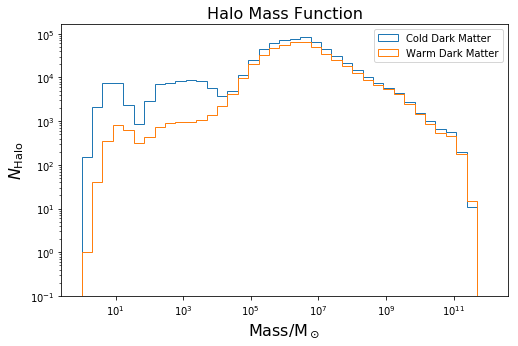

In [56]:
# Create a histogram
bins = np.logspace(0, 12, 40) #always pre-specify bins

fig = plt.figure(figsize = (8,5))
N_cdm, bins_cdm, patches_cdm = plt.hist(cdm_mass, bins = bins, log = True, histtype = 'step', label = "Cold Dark Matter")
N_wdm, bins_wdm, patches_wdm = plt.hist(wdm_mass, bins = bins, log = True, histtype = 'step', label = "Warm Dark Matter")
plt.title("Halo Mass Function", fontsize = 16)
plt.ylabel(r"$N_{\rm {Halo}}$", fontsize = 16)
plt.xlabel("Mass/M$_\odot$", fontsize = 16)
plt.xscale("Log")
plt.legend()
plt.savefig("Images/Data3/SMF_Hist.png")
plt.show()

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


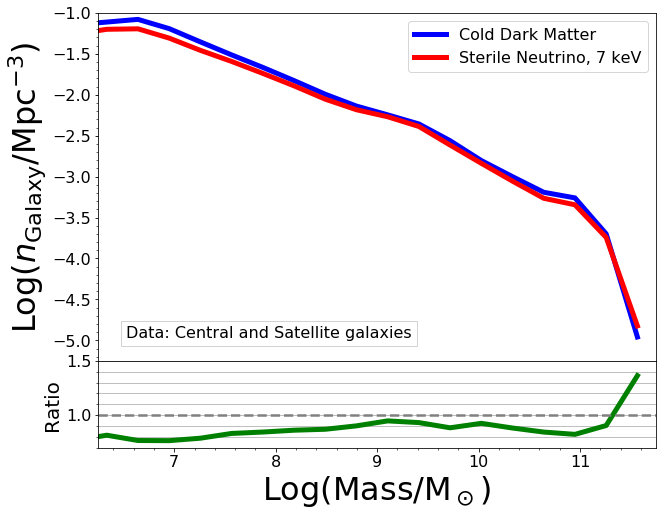

In [5]:
# line plot of histogram
# USE for report!!

volume = 100.0**3 #Mpc^3
n_cdm = N_cdm/volume
n_wdm = N_wdm/volume
m_res = np.log10(8.8*10**6*50)

textstr = 'Data: Central and Satellite galaxies'
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(10,8))
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid0.plot(np.log10(0.5*(bins[1:]+bins[:-1])), np.log10(n_cdm), label = "Cold Dark Matter",  linewidth = 5, color = "blue")
grid0.plot(np.log10(0.5*(bins[1:]+bins[:-1])), np.log10(n_wdm), label = "Sterile Neutrino, 7 keV",  linewidth = 5, color = "red")
#grid0.axvline(x = m_res, color = "black", ls = "--")
#plt.title("Halo Mass Function", fontsize = 16)
grid0.set_ylabel(r"Log($n_{\rm {Galaxy}}$/Mpc$^{-3}$)", fontsize = 32)
grid0.legend(fontsize=16)
grid0.minorticks_on()
grid0.tick_params(labelsize=16)
grid0.set_ylim(-5.25, -1)
grid0.set_xlim(6.25, 11.75)
grid0.text(0.05, 0.1, textstr, transform=grid0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

grid1.plot(np.log10(0.5*(bins[1:]+bins[:-1])), n_wdm/n_cdm,  linewidth = 5, color = "green")
grid1.set_xlabel("Log(Mass/M$_\odot$)", fontsize = 32)
grid1.set_ylabel("Ratio", fontsize = 20)
#grid1.axvline(x = m_res, color = "black", ls = "--")
grid1.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid1.minorticks_on()
grid1.tick_params(labelsize=16)
grid1.set_ylim(0.7, 1.5)
grid1.set_xlim(6.25, 11.75)
grid1.yaxis.grid(which = "both")

plt.savefig("Images/Data3/SMF.pdf")
plt.savefig("Images/Data3/SMF.png")
plt.show()

### Try adding error bars!

In [33]:
volume = 100.0**3 #Mpc^3

# Compute Poisson errors in each bin
errors_cdm = []
errors_wdm = []

for i in range(len(n_cdm)):
    errors_cdm.append(stats.poisson_err(N_cdm[i]))
for i in range(len(n_wdm)):
    errors_wdm.append(stats.poisson_err(N_wdm[i]))

# Turn into a numpy array
errors_cdm = np.array(errors_cdm)
errors_wdm = np.array(errors_wdm)

errLow_cdm = np.log10(errors_cdm[:,0] / volume)
errHigh_cdm = np.log10(errors_cdm[:,1]/ volume)

errLow_wdm = np.log10(errors_wdm[:,0] / volume)
errHigh_wdm = np.log10(errors_wdm[:,1]/ volume)

# The plt.errorbar module needs yerr to be inserted as a relative difference to the y-value of the coordinate.
low_lim_cdm = np.log10(n_cdm) - errLow_cdm
up_lim_cdm = errHigh_cdm - np.log10(n_cdm)

low_lim_wdm = np.log10(n_wdm) - errLow_wdm
up_lim_wdm = errHigh_wdm - np.log10(n_wdm)

# And now plot the result
low_lim_cdm, up_lim_cdm, low_lim_wdm, up_lim_wdm

C:\Users\shife\OneDrive\Harvard_Stuff\Astro_98\stats.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  err_low = count * ( 1 - 1/(9 * count) - 1/(3 * np.sqrt(count))  )**3
C:\Users\shife\OneDrive\Harvard_Stuff\Astro_98\stats.py:27: RuntimeWarning: invalid value encountered in double_scalars
  err_low = count * ( 1 - 1/(9 * count) - 1/(3 * np.sqrt(count))  )**3
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10


(array([ 0.03686356,  0.00955674,  0.00500685,  0.00506748,  0.00914739,
         0.0152492 ,  0.00807192,  0.0052436 ,  0.00512113,  0.00476003,
         0.00461637,  0.00485975,  0.00570431,  0.00712093,  0.00627415,
         0.00406474,  0.00274156,  0.00208107,  0.00176332,  0.00162324,
         0.00156468,  0.00150667,  0.00171604,  0.00206878,  0.00248502,
         0.00296482,  0.00357013,  0.00433077,  0.00512043,  0.00579798,
         0.00659633,  0.00836319,  0.01109056,  0.01396253,  0.01745991,
         0.01892479,  0.03184905,  0.15271564,         nan]),
 array([ 0.03397787,  0.00935096,  0.00494978,  0.00500903,  0.00895869,
         0.01473187,  0.00792462,  0.00518105,  0.00506145,  0.00470842,
         0.00456781,  0.00480597,  0.00563036,  0.00700605,  0.0061848 ,
         0.00402704,  0.00272436,  0.00207114,  0.00175619,  0.00161719,
         0.00155907,  0.00150146,  0.00170928,  0.00205897,  0.00247088,
         0.00294472,  0.00354102,  0.00428801,  0.00506076,  0

In [50]:
def giveratio(dn_a, dn_b, err_a_low, err_a_high, err_b_low, err_b_high):
    # Ratio and errors of mf_a / mf_b
    ratio = dn_a / dn_b
    rel_a_low, rel_a_high = (dn_a-err_a_low) / dn_a, (err_a_high-dn_a) / dn_a
    rel_b_low, rel_b_high = (dn_b-err_b_low) /dn_b, (err_b_high-dn_b) / dn_b
    err_ratio_low = ratio * np.sqrt(rel_a_low**2 + rel_b_low**2)
    err_ratio_high = ratio * np.sqrt(rel_a_high**2 + rel_b_high**2)
    return ratio, err_ratio_low, err_ratio_high

ratio, low_lim_ratio, up_lim_ratio = giveratio(n_wdm, n_cdm, errors_wdm[:,0] / volume, errors_wdm[:,1] / volume, errors_cdm[:,0] / volume, errors_cdm[:,1] / volume)

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
C:\Users\shife\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:2953: RuntimeWarning: invalid value encountered in double_scalars
  high = [thisx + thiserr for (thisx, thiserr)
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


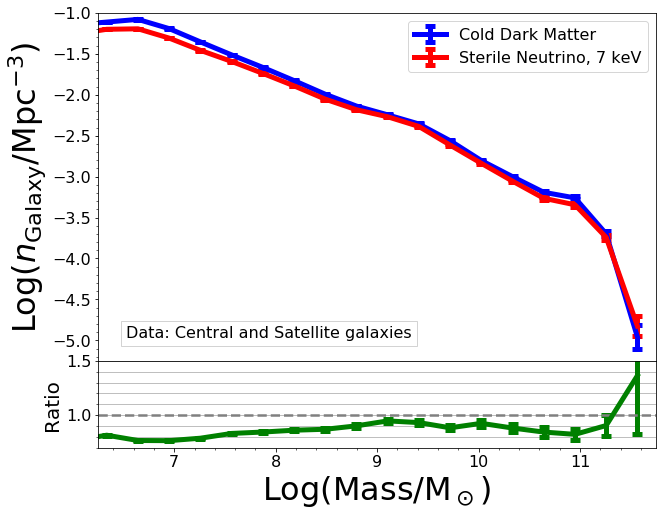

In [51]:
# line plot of histogram
# USE for report!!
volume = 100.0**3 #Mpc^3
n_cdm = N_cdm/volume
n_wdm = N_wdm/volume
m_res = np.log10(8.8*10**6*50)

textstr = 'Data: Central and Satellite galaxies'
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(10,8))
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid0.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])), np.log10(n_cdm), yerr = [low_lim_cdm, up_lim_cdm], capsize = 5, capthick = 5, label = "Cold Dark Matter",  linewidth = 5, color = "blue")
grid0.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])), np.log10(n_wdm), yerr = [low_lim_wdm, up_lim_wdm], capsize = 5, capthick = 5, label = "Sterile Neutrino, 7 keV",  linewidth = 5, color = "red")
#grid0.axvline(x = m_res, color = "black", ls = "--")
#plt.title("Halo Mass Function", fontsize = 16)
grid0.set_ylabel(r"Log($n_{\rm {Galaxy}}$/Mpc$^{-3}$)", fontsize = 32)
grid0.legend(fontsize=16)
grid0.minorticks_on()
grid0.tick_params(labelsize=16)
grid0.set_ylim(-5.25, -1)
grid0.set_xlim(6.25, 11.75)
grid0.text(0.05, 0.1, textstr, transform=grid0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

grid1.errorbar(np.log10(0.5*(bins[1:]+bins[:-1])), ratio, yerr = [low_lim_ratio, up_lim_ratio], capsize = 5, capthick = 5, linewidth = 5, color = "green")
grid1.set_xlabel("Log(Mass/M$_\odot$)", fontsize = 32)
grid1.set_ylabel("Ratio", fontsize = 20)
#grid1.axvline(x = m_res, color = "black", ls = "--")
grid1.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid1.minorticks_on()
grid1.tick_params(labelsize=16)
grid1.set_ylim(0.7, 1.5)
grid1.set_xlim(6.25, 11.75)
grid1.yaxis.grid(which = "both")

plt.savefig("Images/Data3/SMF_Error.pdf")
plt.savefig("Images/Data3/SMF_Error.png")
plt.show()

In [35]:
n_cdm
0.5*(bins[1:]+bins[:-1])

array([  1.51545881e+00,   3.07777200e+00,   6.25070139e+00,
         1.26946596e+01,   2.57818079e+01,   5.23607279e+01,
         1.06340325e+02,   2.15968440e+02,   4.38614110e+02,
         8.90789124e+02,   1.80911933e+03,   3.67417232e+03,
         7.46194132e+03,   1.51545881e+04,   3.07777200e+04,
         6.25070139e+04,   1.26946596e+05,   2.57818079e+05,
         5.23607279e+05,   1.06340325e+06,   2.15968440e+06,
         4.38614110e+06,   8.90789124e+06,   1.80911933e+07,
         3.67417232e+07,   7.46194132e+07,   1.51545881e+08,
         3.07777200e+08,   6.25070139e+08,   1.26946596e+09,
         2.57818079e+09,   5.23607279e+09,   1.06340325e+10,
         2.15968440e+10,   4.38614110e+10,   8.90789124e+10,
         1.80911933e+11,   3.67417232e+11,   7.46194132e+11])

In [11]:
np.savetxt("n_cdm.txt", n_cdm, fmt = "%f")
np.savetxt("n_wdm.txt", n_wdm, fmt = "%f")
np.savetxt("bins.txt", 0.5*(bins[1:]+bins[:-1]), fmt = "%f")

In [ ]:
len(cdm_mass), len(wdm_mass)

# Now let's calculate the correlation function at fixed abundance

In [59]:
cdm_mass_ind = sorted(range(len(cdm_mass)), key=lambda k: cdm_mass[k], reverse = True)
wdm_mass_ind = sorted(range(len(wdm_mass)), key=lambda k: wdm_mass[k], reverse = True)

cdm_mass[cdm_mass_ind], wdm_mass[wdm_mass_ind], cdm_mass[cdm_mass_ind[:477870]], wdm_mass[wdm_mass_ind[:477870]]

(array([  3.81787046e+11,   3.56176069e+11,   3.55112714e+11, ...,
          9.65455949e-01,   9.48986411e-01,   9.17113662e-01]),
 array([  4.49988231e+11,   4.41800557e+11,   3.80657369e+11, ...,
          2.32012701e+00,   2.14481068e+00,   1.71668553e+00]),
 array([  3.81787046e+11,   3.56176069e+11,   3.55112714e+11, ...,
          4.75707000e+05,   4.75702906e+05,   4.75699125e+05]),
 array([  4.49988231e+11,   4.41800557e+11,   3.80657369e+11, ...,
          2.32012701e+00,   2.14481068e+00,   1.71668553e+00]))

In [ ]:
len(set(wdm_mass[wdm_mass_ind[:477870]]) & set(wdm_mass[wdm_mass_ind[:1000000]]))

In [ ]:
np.savetxt("cdm_galaxy.txt", cdm_position[cdm_mass_ind[:477870]], fmt = "%f %f %f")
np.savetxt("wdm_galaxy.txt", wdm_position[wdm_mass_ind[:477870]], fmt = "%f %f %f")

cdm_position[cdm_mass_ind[:477870]], wdm_position[wdm_mass_ind[:477870]]

In [ ]:
CUTE_cdm_sorted = np.genfromtxt("corr_cdm_galaxy.txt", usecols = (0,1))
CUTE_wdm_sorted = np.genfromtxt("corr_wdm_galaxy.txt", usecols = (0,1))

plt.figure(figsize=(8,6))
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.loglog(CUTE_cdm_sorted[:,0], CUTE_cdm_sorted[:,1], label = "Cold Dark Matter")
grid0.loglog(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1], label = "Sterile Neutrino, 7 keV")
grid0.set_xlim(5*10**-3, 2e1)
grid0.set_ylim(10**-0.75, 10**5)
grid0.set_ylabel(r"$\xi$/Mpc", fontsize = 16)
grid0.legend()
grid0.minorticks_on()
grid0.set_title("$\sim$0.5 Galaxy/Mpc$^{3}$", fontsize = 16)
grid0.text(2.5,10**3.75, "Includes subhalos", fontsize=10, color = "dimgrey")

grid1.semilogx(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1]/CUTE_cdm_sorted[:,1])
grid1.set_xlabel("Radius/Mpc", fontsize = 16)
grid1.set_ylabel("Ratio")
grid1.axhline(y = 1, color = "grey", ls = "--")
grid1.set_xlim(5*10**-3, 2e1)
grid1.set_ylim(1, 2.75)
grid1.minorticks_on()

plt.savefig("Images/Data3/Corrfunc.png")
plt.show()

Reduce number density till you reach 10^6 solar masses

In [92]:
cdm_mass[cdm_mass_ind], wdm_mass[wdm_mass_ind], cdm_mass[cdm_mass_ind[:326952]], wdm_mass[wdm_mass_ind[:326952]]

(array([  3.81787046e+11,   3.56176069e+11,   3.55112714e+11, ...,
          9.65455949e-01,   9.48986411e-01,   9.17113662e-01]),
 array([  4.49988231e+11,   4.41800557e+11,   3.80657369e+11, ...,
          2.32012701e+00,   2.14481068e+00,   1.71668553e+00]),
 array([  3.81787046e+11,   3.56176069e+11,   3.55112714e+11, ...,
          2.14733225e+06,   2.14731925e+06,   2.14731550e+06]),
 array([  4.49988231e+11,   4.41800557e+11,   3.80657369e+11, ...,
          1.00000881e+06,   1.00000469e+06,   1.00000469e+06]))

In [ ]:
np.savetxt("cdm_galaxy2.txt", cdm_position[cdm_mass_ind[:326952]], fmt = "%f %f %f")
np.savetxt("wdm_galaxy2.txt", wdm_position[wdm_mass_ind[:326952]], fmt = "%f %f %f")

cdm_position[cdm_mass_ind[:326952]], wdm_position[wdm_mass_ind[:326952]]

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


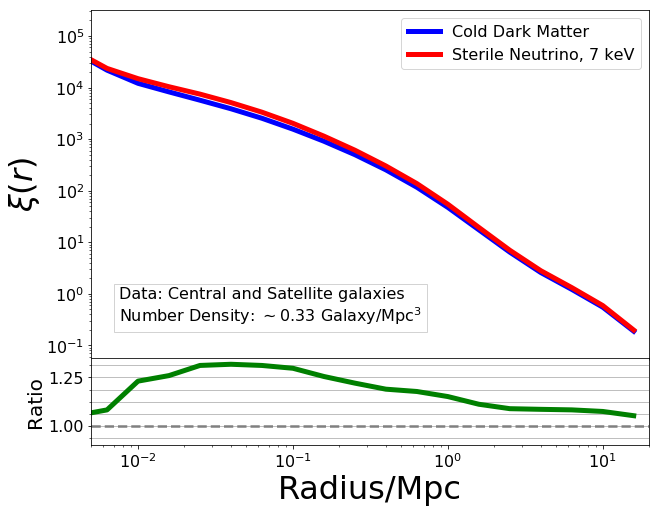

In [99]:
CUTE_cdm_sorted = np.genfromtxt("corr_cdm_galaxy2.txt", usecols = (0,1))
CUTE_wdm_sorted = np.genfromtxt("corr_wdm_galaxy2.txt", usecols = (0,1))

textstr = '\n'.join((
    r'Data: Central and Satellite galaxies',
    r'Number Density: $\sim$0.33 Galaxy/Mpc$^{3}$'))
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(10,8))
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.loglog(CUTE_cdm_sorted[:,0], CUTE_cdm_sorted[:,1], label = "Cold Dark Matter",  linewidth = 5, color = "blue")
grid0.loglog(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1], label = "Sterile Neutrino, 7 keV",  linewidth = 5, color = "red")
grid0.set_xlim(5*10**-3, 2e1)
grid0.set_ylim(10**-1.25, 10**5.5)
grid0.set_ylabel(r"$\xi(r)$", fontsize = 32)
grid0.legend(fontsize = 16)
grid0.minorticks_on()
grid0.tick_params(labelsize=16)
grid0.text(0.05, 0.2, textstr, transform=grid0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

grid1.semilogx(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1]/CUTE_cdm_sorted[:,1],  linewidth = 5, color = "green")
grid1.set_xlabel("Radius/Mpc", fontsize = 32)
grid1.set_ylabel("Ratio", fontsize = 20)
grid1.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid1.set_xlim(5*10**-3, 2e1)
grid1.set_ylim(0.9, 1.35)
grid1.minorticks_on()
grid1.tick_params(labelsize=16)
grid1.yaxis.grid(which = "both")

plt.savefig("Images/Data3/Corrfunc2.png")
plt.savefig("Images/Data3/Corrfunc2.pdf")
plt.show()

### Same number density as color graph

In [60]:
cdm_mass[cdm_mass_ind], wdm_mass[wdm_mass_ind], cdm_mass[cdm_mass_ind[:136834]], wdm_mass[wdm_mass_ind[:136834]]

(array([  3.81787046e+11,   3.56176069e+11,   3.55112714e+11, ...,
          9.65455949e-01,   9.48986411e-01,   9.17113662e-01]),
 array([  4.49988231e+11,   4.41800557e+11,   3.80657369e+11, ...,
          2.32012701e+00,   2.14481068e+00,   1.71668553e+00]),
 array([  3.81787046e+11,   3.56176069e+11,   3.55112714e+11, ...,
          1.34842770e+07,   1.34841820e+07,   1.34840580e+07]),
 array([  4.49988231e+11,   4.41800557e+11,   3.80657369e+11, ...,
          9.43739300e+06,   9.43730500e+06,   9.43728600e+06]))

In [ ]:
np.savetxt("cdm_galaxy3.txt", cdm_position[cdm_mass_ind[:136834]], fmt = "%f %f %f")
np.savetxt("wdm_galaxy3.txt", wdm_position[wdm_mass_ind[:136834]], fmt = "%f %f %f")

cdm_position[cdm_mass_ind[:136834]], wdm_position[wdm_mass_ind[:136834]]

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


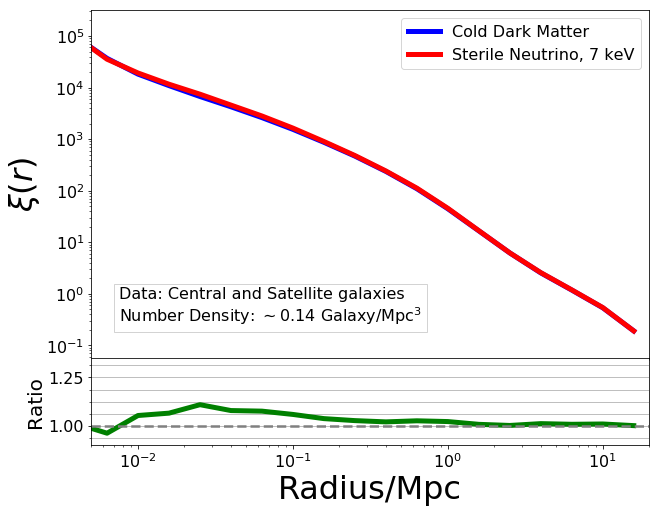

In [97]:
CUTE_cdm_sorted = np.genfromtxt("corr_cdm_galaxy3.txt", usecols = (0,1))
CUTE_wdm_sorted = np.genfromtxt("corr_wdm_galaxy3.txt", usecols = (0,1))

textstr = '\n'.join((
    r'Data: Central and Satellite galaxies',
    r'Number Density: $\sim$0.14 Galaxy/Mpc$^{3}$'))
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(10,8))
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.loglog(CUTE_cdm_sorted[:,0], CUTE_cdm_sorted[:,1], label = "Cold Dark Matter",  linewidth = 5, color = "blue")
grid0.loglog(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1], label = "Sterile Neutrino, 7 keV",  linewidth = 5, color = "red")
grid0.set_xlim(5*10**-3, 2e1)
grid0.set_ylim(10**-1.25, 10**5.5)
grid0.set_ylabel(r"$\xi(r)$", fontsize = 32)
grid0.legend(fontsize = 16)
grid0.minorticks_on()
grid0.tick_params(labelsize=16)
# grid0.set_title("$\sim$0.1 Galaxy/Mpc$^{3}$", fontsize = 16)
# grid0.text(2.5,10**4, "Includes subhalos", fontsize=10, color = "dimgrey")
grid0.text(0.05, 0.2, textstr, transform=grid0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

grid1.semilogx(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1]/CUTE_cdm_sorted[:,1],  linewidth = 5, color = "green")
grid1.set_xlabel("Radius/Mpc", fontsize = 32)
grid1.set_ylabel("Ratio", fontsize = 20)
grid1.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid1.set_xlim(5*10**-3, 2e1)
grid1.set_ylim(0.9, 1.35)
grid1.minorticks_on()
grid1.tick_params(labelsize=16)
grid1.yaxis.grid(which = "both")

plt.savefig("Images/Data3/Corrfunc3.pdf")
plt.savefig("Images/Data3/Corrfunc3.png")
plt.show()

### One order of magnitude lower

In [61]:
cdm_mass[cdm_mass_ind], wdm_mass[wdm_mass_ind], cdm_mass[cdm_mass_ind[:30000]], wdm_mass[wdm_mass_ind[:30000]]

(array([  3.81787046e+11,   3.56176069e+11,   3.55112714e+11, ...,
          9.65455949e-01,   9.48986411e-01,   9.17113662e-01]),
 array([  4.49988231e+11,   4.41800557e+11,   3.80657369e+11, ...,
          2.32012701e+00,   2.14481068e+00,   1.71668553e+00]),
 array([  3.81787046e+11,   3.56176069e+11,   3.55112714e+11, ...,
          2.64467344e+08,   2.64466256e+08,   2.64460928e+08]),
 array([  4.49988231e+11,   4.41800557e+11,   3.80657369e+11, ...,
          2.16056176e+08,   2.16053728e+08,   2.16029472e+08]))

In [ ]:
np.savetxt("cdm_galaxy4.txt", cdm_position[cdm_mass_ind[:30000]], fmt = "%f %f %f")
np.savetxt("wdm_galaxy4.txt", wdm_position[wdm_mass_ind[:30000]], fmt = "%f %f %f")

cdm_position[cdm_mass_ind[:30000]], wdm_position[wdm_mass_ind[:30000]]

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


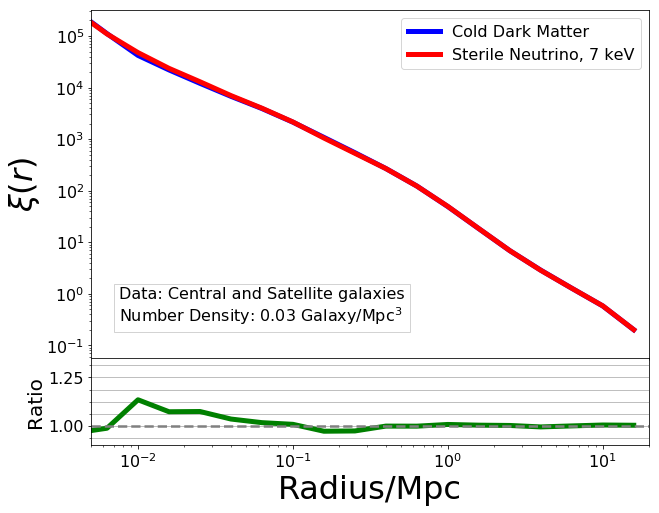

In [98]:
CUTE_cdm_sorted = np.genfromtxt("corr_cdm_galaxy4.txt", usecols = (0,1))
CUTE_wdm_sorted = np.genfromtxt("corr_wdm_galaxy4.txt", usecols = (0,1))

textstr = '\n'.join((
    r'Data: Central and Satellite galaxies',
    r'Number Density: 0.03 Galaxy/Mpc$^{3}$'))
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

plt.figure(figsize=(10,8))
grid = gridspec.GridSpec(2,1, height_ratios = [4,1])
grid.update(hspace = 0)
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])

grid0.loglog(CUTE_cdm_sorted[:,0], CUTE_cdm_sorted[:,1], label = "Cold Dark Matter",  linewidth = 5, color = "blue")
grid0.loglog(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1], label = "Sterile Neutrino, 7 keV",  linewidth = 5, color = "red")
grid0.set_xlim(5*10**-3, 2e1)
grid0.set_ylim(10**-1.25, 10**5.5)
grid0.set_ylabel(r"$\xi(r)$", fontsize = 32)
grid0.legend(fontsize = 16)
grid0.minorticks_on()
grid0.tick_params(labelsize=16)
# grid0.set_title("0.03 Galaxy/Mpc$^{3}$", fontsize = 16)
# grid0.text(2.5,10**4, "Includes subhalos", fontsize=10, color = "dimgrey")
grid0.text(0.05, 0.2, textstr, transform=grid0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

grid1.semilogx(CUTE_wdm_sorted[:,0], CUTE_wdm_sorted[:,1]/CUTE_cdm_sorted[:,1],  linewidth = 5, color = "green")
grid1.set_xlabel("Radius/Mpc", fontsize = 32)
grid1.set_ylabel("Ratio", fontsize = 20)
grid1.axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
grid1.set_xlim(5*10**-3, 2e1)
grid1.set_ylim(0.9, 1.35)
grid1.minorticks_on()
grid1.tick_params(labelsize=16)
grid1.yaxis.grid(which = "both")

plt.savefig("Images/Data3/Corrfunc4.pdf")
plt.savefig("Images/Data3/Corrfunc4.png")
plt.show()

check if these are measurable scales

# Split by color!

In [15]:
# CDM Color
cdm_color1_ind = np.where(cdm_color < 0.5)
cdm_color2_ind = np.where(cdm_color > 0.5)

cdm_color1 = np.array(cdm_color)[cdm_color1_ind]
cdm_color2 = np.array(cdm_color)[cdm_color2_ind]

# WDM Color
wdm_color1_ind = np.where(wdm_color < 0.5)
wdm_color2_ind = np.where(wdm_color > 0.5)

wdm_color1 = np.array(wdm_color)[wdm_color1_ind]
wdm_color2 = np.array(wdm_color)[wdm_color2_ind]

print(cdm_color1, cdm_color2)
print(wdm_color1, wdm_color2)

print(len(cdm_color1), len(cdm_color2))
print(len(wdm_color1), len(wdm_color2))

[ 0.32435036  0.32047844  0.34921455 ...,  0.33903694  0.3278513   0.3150177 ] [ 0.58950651  0.58872032  0.59603977 ...,  0.58978331  0.58985472
  0.60267353]
[ 0.29584217  0.29859257  0.43961906 ...,  0.3280344   0.32156372
  0.32803154] [ 0.59355354  0.56102371  0.6056962  ...,  0.60710955  0.56064034
  0.59656096]
156310 505321
136834 341035


In [19]:
cdm_color1_ind = sorted(range(len(cdm_color1)), key=lambda k: cdm_mass[k], reverse = True)
wdm_color1_ind = sorted(range(len(wdm_color1)), key=lambda k: wdm_mass[k], reverse = True)

print(cdm_mass[cdm_color1_ind], wdm_mass[wdm_color1_ind])
print(cdm_mass[cdm_color1_ind[:136834]], wdm_mass[wdm_color1_ind[:136834]])

cdm_color2_ind = sorted(range(len(cdm_color2)), key=lambda k: cdm_mass[k], reverse = True)
wdm_color2_ind = sorted(range(len(wdm_color2)), key=lambda k: wdm_mass[k], reverse = True)

print(cdm_mass[cdm_color2_ind], wdm_mass[wdm_color2_ind])
print(cdm_mass[cdm_color2_ind[:136834]], wdm_mass[wdm_color2_ind[:136834]])

[  2.37373587e+11   2.29835653e+11   2.26973467e+11 ...,   1.32806551e+00
   1.07414138e+00   9.86246765e-01] [  4.49988231e+11   2.55446024e+11   2.37092700e+11 ...,   3.16091633e+00
   2.62830281e+00   1.71668553e+00]
[  2.37373587e+11   2.29835653e+11   2.26973467e+11 ...,   6.50881172e+04
   6.50662461e+04   6.50608320e+04] [  4.49988231e+11   2.55446024e+11   2.37092700e+11 ...,   3.16091633e+00
   2.62830281e+00   1.71668553e+00]
[  3.81787046e+11   3.56176069e+11   3.55112714e+11 ...,   9.86246765e-01
   9.48986411e-01   9.17113662e-01] [  4.49988231e+11   4.41800557e+11   3.01634585e+11 ...,   2.32012701e+00
   2.14481068e+00   1.71668553e+00]
[  3.81787046e+11   3.56176069e+11   3.55112714e+11 ...,   8.04266850e+06
   8.04259150e+06   8.04258150e+06] [  4.49988231e+11   4.41800557e+11   3.01634585e+11 ...,   4.81580850e+06
   4.81574500e+06   4.81573450e+06]


In [20]:
cdm_pos1 = np.array(cdm_position)[cdm_color1_ind[:136834]]
cdm_pos2 = np.array(cdm_position)[cdm_color2_ind[:136834]]

wdm_pos1 = np.array(wdm_position)[wdm_color1_ind[:136834]]
wdm_pos2 = np.array(wdm_position)[wdm_color2_ind[:136834]]

In [ ]:
np.savetxt("cdm_color1.txt", cdm_pos1, fmt = "%f %f %f")
np.savetxt("wdm_color1.txt", wdm_pos1, fmt = "%f %f %f")

np.savetxt("cdm_color2.txt", cdm_pos2, fmt = "%f %f %f")
np.savetxt("wdm_color2.txt", wdm_pos2, fmt = "%f %f %f")

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


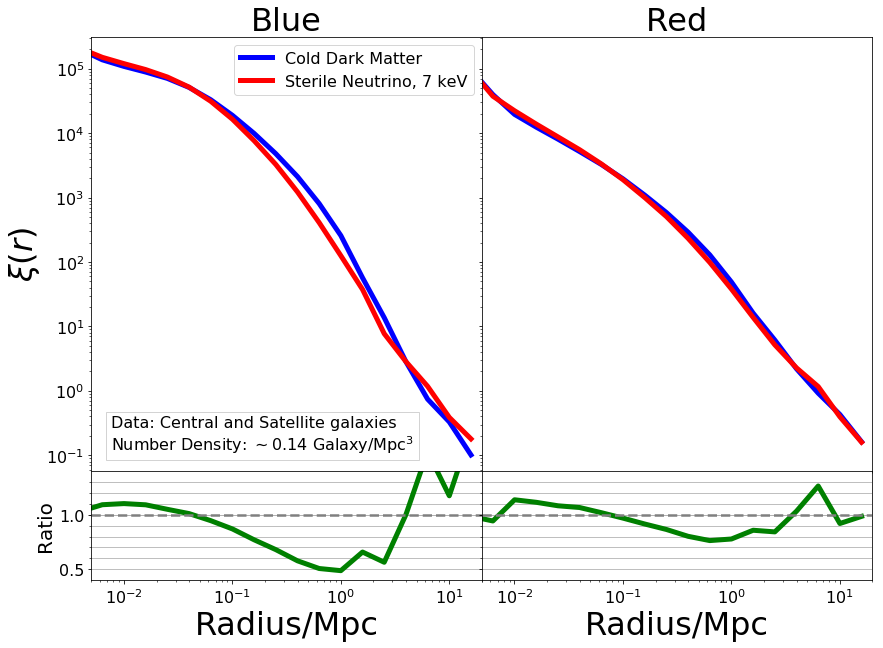

In [95]:
CUTE_cdm_color1 = np.genfromtxt("corr_cdm_color1.txt", usecols = (0,1))
CUTE_wdm_color1 = np.genfromtxt("corr_wdm_color1.txt", usecols = (0,1))

CUTE_cdm_color2 = np.genfromtxt("corr_cdm_color2.txt", usecols = (0,1))
CUTE_wdm_color2 = np.genfromtxt("corr_wdm_color2.txt", usecols = (0,1))

grid = gridspec.GridSpec(2,2, height_ratios = [4,1])
grid.update(hspace = 0, wspace = 0)
plt.figure(figsize=(14,10))
    
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid2 = plt.subplot(grid[2])
grid3 = plt.subplot(grid[3])

textstr = '\n'.join((
    r'Data: Central and Satellite galaxies',
    r'Number Density: $\sim$0.14 Galaxy/Mpc$^{3}$'))
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

grid0.loglog(CUTE_cdm_color1[:,0], CUTE_cdm_color1[:,1], label = "Cold Dark Matter",  linewidth = 5, color = "blue")
grid0.loglog(CUTE_wdm_color1[:,0], CUTE_wdm_color1[:,1], label = "Sterile Neutrino, 7 keV",  linewidth = 5, color = "red")
grid0.set_ylabel(r"$\xi(r)$", fontsize = 32)
grid0.set_title(r"Blue", fontsize = 32)
# grid0.text(5*10**-2.75,10**-1, "Includes subhalos", fontsize=10, color = "dimgrey")
grid0.legend(fontsize = 16)
grid0.tick_params(labelsize=16)
grid0.text(0.05, 0.125, textstr, transform=grid0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

grid1.loglog(CUTE_cdm_color2[:,0], CUTE_cdm_color2[:,1],  linewidth = 5, color = "blue")
grid1.loglog(CUTE_wdm_color2[:,0], CUTE_wdm_color2[:,1],  linewidth = 5, color = "red")
grid1.set_title(r"Red", fontsize = 32)
# grid1.text(5*10**-2.75,10**-1, "Includes subhalos", fontsize=10, color = "dimgrey")
# grid1.set_xticks([])
# grid1.set_xticklabels([])

grid2.semilogx(CUTE_wdm_color1[:,0], CUTE_wdm_color1[:,1]/CUTE_cdm_color1[:,1],  linewidth = 5, color = "green")
grid2.set_xlabel("Radius/Mpc", fontsize = 32)
grid2.set_ylabel("Ratio", fontsize = 20)
grid2.tick_params(labelsize=16)
grid2.yaxis.grid(which = "both")

grid3.semilogx(CUTE_wdm_color2[:,0], CUTE_wdm_color2[:,1]/CUTE_cdm_color2[:,1],  linewidth = 5, color = "green")
grid3.set_xlabel("Radius/Mpc", fontsize = 32)
grid3.tick_params(labelsize=16)
grid3.yaxis.grid(which = "both")
# grid3.minorticks_on()

for i in range(4):
    plt.subplot(grid[i]).minorticks_on()
    plt.subplot(grid[i]).set_xlim(5*10**-3, 2e1)
    plt.subplot(grid[i]).set_ylim(10**-1.25, 10**5.5)

for i in range(2,4):
    plt.subplot(grid[i]).set_ylim(0.4, 1.4)
    plt.subplot(grid[i]).axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
    
for i in [1,3]:
    plt.subplot(grid[i]).set_yticklabels([]) 
#     plt.subplot(grid[i]).set_yticks([])
    
plt.savefig("Images/Data3/Corrfunc_Color.pdf")
plt.show()

Use same abundance as previous plot

In [ ]:
print(cdm_mass[cdm_color1_ind], wdm_mass[wdm_color1_ind])
print(cdm_mass[cdm_color1_ind[:30000]], wdm_mass[wdm_color1_ind[:30000]])

print(cdm_mass[cdm_color2_ind], wdm_mass[wdm_color2_ind])
print(cdm_mass[cdm_color2_ind[:30000]], wdm_mass[wdm_color2_ind[:30000]])

In [ ]:
cdm_pos1 = np.array(cdm_position)[cdm_color1_ind[:30000]]
cdm_pos2 = np.array(cdm_position)[cdm_color2_ind[:30000]]

wdm_pos1 = np.array(wdm_position)[wdm_color1_ind[:30000]]
wdm_pos2 = np.array(wdm_position)[wdm_color2_ind[:30000]]

In [ ]:
np.savetxt("cdm_color1_sample.txt", cdm_pos1, fmt = "%f %f %f")
np.savetxt("wdm_color1_sample.txt", wdm_pos1, fmt = "%f %f %f")

np.savetxt("cdm_color2_sample.txt", cdm_pos2, fmt = "%f %f %f")
np.savetxt("wdm_color2_sample.txt", wdm_pos2, fmt = "%f %f %f")

C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
C:\Users\shife\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


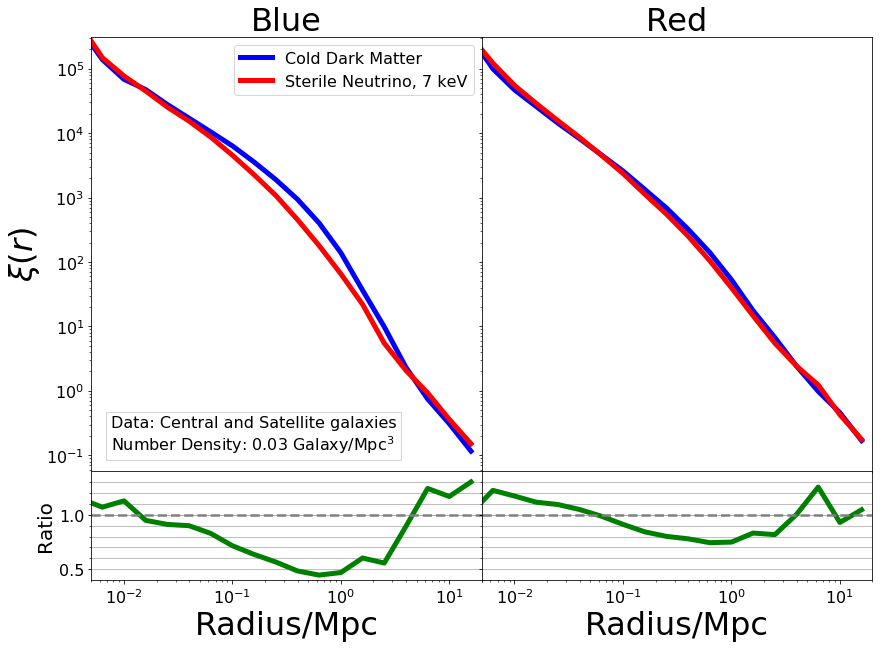

In [93]:
CUTE_cdm_color1 = np.genfromtxt("corr_cdm_color1_sample.txt", usecols = (0,1))
CUTE_wdm_color1 = np.genfromtxt("corr_wdm_color1_sample.txt", usecols = (0,1))

CUTE_cdm_color2 = np.genfromtxt("corr_cdm_color2_sample.txt", usecols = (0,1))
CUTE_wdm_color2 = np.genfromtxt("corr_wdm_color2_sample.txt", usecols = (0,1))

grid = gridspec.GridSpec(2,2, height_ratios = [4,1])
grid.update(hspace = 0, wspace = 0)
plt.figure(figsize=(14,10))
    
grid0 = plt.subplot(grid[0])
grid1 = plt.subplot(grid[1])
grid2 = plt.subplot(grid[2])
grid3 = plt.subplot(grid[3])

textstr = '\n'.join((
    r'Data: Central and Satellite galaxies',
    r'Number Density: 0.03 Galaxy/Mpc$^{3}$'))
props = dict(facecolor='none', edgecolor='lightgrey', pad = 5.0)

grid0.loglog(CUTE_cdm_color1[:,0], CUTE_cdm_color1[:,1], label = "Cold Dark Matter",  linewidth = 5, color = "blue")
grid0.loglog(CUTE_wdm_color1[:,0], CUTE_wdm_color1[:,1], label = "Sterile Neutrino, 7 keV",  linewidth = 5, color = "red")
grid0.set_ylabel(r"$\xi(r)$", fontsize = 32)
grid0.set_title(r"Blue", fontsize = 32)
# grid0.text(5*10**-2.75,10**-1, "Includes subhalos", fontsize=10, color = "dimgrey")
grid0.legend(fontsize = 16)
grid0.tick_params(labelsize=16)
grid0.text(0.05, 0.125, textstr, transform=grid0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

grid1.loglog(CUTE_cdm_color2[:,0], CUTE_cdm_color2[:,1],  linewidth = 5, color = "blue")
grid1.loglog(CUTE_wdm_color2[:,0], CUTE_wdm_color2[:,1],  linewidth = 5, color = "red")
grid1.set_title(r"Red", fontsize = 32)
# grid1.text(5*10**-2.75,10**-1, "Includes subhalos", fontsize=10, color = "dimgrey")
grid1.set_xticks([])
grid1.set_xticklabels([])
grid1.tick_params(labelsize=16)

grid2.semilogx(CUTE_wdm_color1[:,0], CUTE_wdm_color1[:,1]/CUTE_cdm_color1[:,1],  linewidth = 5, color = "green")
grid2.set_xlabel("Radius/Mpc", fontsize = 32)
grid2.set_ylabel("Ratio", fontsize = 20)
grid2.tick_params(labelsize=16)
grid2.yaxis.grid(which = "both")

grid3.semilogx(CUTE_wdm_color2[:,0], CUTE_wdm_color2[:,1]/CUTE_cdm_color2[:,1],  linewidth = 5, color = "green")
grid3.set_xlabel("Radius/Mpc", fontsize = 32)
grid3.tick_params(labelsize=16)
grid3.yaxis.grid(which = "both")

for i in range(4):
    plt.subplot(grid[i]).minorticks_on()
    plt.subplot(grid[i]).set_xlim(5*10**-3, 2e1)
    plt.subplot(grid[i]).set_ylim(10**-1.25, 10**5.5)

for i in range(2,4):
    plt.subplot(grid[i]).set_ylim(0.4, 1.4)
    plt.subplot(grid[i]).axhline(y = 1, color = "grey", ls = "--", linewidth = 2.5)
    
for i in [1,3]:
    plt.subplot(grid[i]).set_yticklabels([]) 
#     plt.subplot(grid[i]).set_yticks([])
    
plt.savefig("Images/Data3/Corrfunc_Color_Sample.pdf")
plt.savefig("Images/Data3/Corrfunc_Color_Sample.png")
plt.show()

blue galaxies are typically centrals: more clustered in CDM as expected

red galaxies tend to be satellites because they fall into blue parent halo and get stripped away into red --> because we're only looking at satellites galaxies CDM is naturally more correlated

In [21]:
cdm_central = cdm[list(cdm.keys())[2]][:]
wdm_central = wdm[list(wdm.keys())[2]][:]

print(np.where(cdm_central[cdm_color1_ind] == 0))
print(len(np.where(cdm_central[cdm_color1_ind] == 0)[0])/len(cdm_color1_ind))
print(len(np.where(wdm_central[wdm_color1_ind] == 0)[0])/len(wdm_color1_ind))
print(len(np.where(cdm_central[cdm_color2_ind] == 0)[0])/len(cdm_color2_ind))
print(len(np.where(wdm_central[wdm_color2_ind] == 0)[0])/len(wdm_color2_ind))
print()
print(len(np.where(cdm_central[cdm_color1_ind[:30000]] == 0)[0])/30000)
print(len(np.where(wdm_central[wdm_color1_ind[:30000]] == 0)[0])/30000)
print(len(np.where(cdm_central[cdm_color2_ind[:30000]] == 0)[0])/30000)
print(len(np.where(wdm_central[wdm_color2_ind[:30000]] == 0)[0])/30000)
print()
print(len(np.where(cdm_central[cdm_color1_ind[:136834]] == 0)[0])/136834)
print(len(np.where(wdm_central[wdm_color1_ind[:136834]] == 0)[0])/136834)
print(len(np.where(cdm_central[cdm_color2_ind[:136834]] == 0)[0])/136834)
print(len(np.where(wdm_central[wdm_color2_ind[:136834]] == 0)[0])/136834)
print()
print(len(np.where(cdm_central[cdm_color1_ind[:50000]] == 0)[0])/50000)
print(len(np.where(wdm_central[wdm_color1_ind[:50000]] == 0)[0])/50000)
print(len(np.where(cdm_central[cdm_color2_ind[:50000]] == 0)[0])/50000)
print(len(np.where(wdm_central[wdm_color2_ind[:50000]] == 0)[0])/50000)


(array([    11,     16,     18, ..., 156307, 156308, 156309], dtype=int64),)
0.7130893736805067
0.6588494087726735
0.7241278316159432
0.6744263785241984

0.4452333333333333
0.41706666666666664
0.40973333333333334
0.3884666666666667

0.6830685355978777
0.6588494087726735
0.47169563120277125
0.46346668225733373

0.46066
0.44012
0.42946
0.41332


^^^ cdm has more satellite galaxies than wdm --> more clustered on 1 Mpc scales